### Notes
- `CPIAUCSL.csv` - US CPI (inflation measure)
- `RRVRUSQ156N.csv` - rental vacancy rate, quarterly
- `MORTGATE30US.csv` - mortgage interest rates, weekly
- `Metro_median_sale_price_uc_sfrcondo_week.csv` - median sale price for US houses
- `Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv` - Zillow home value index

## Loading Federal Reserve data

In [1]:
import pandas as pd, numpy as np

fed_files = ["https://raw.githubusercontent.com/baothanhquach1661/DataEngineer-Projects/main/House-Prices-Prediction-ML-Python/CPIAUCSL.csv", 
             "https://raw.githubusercontent.com/baothanhquach1661/DataEngineer-Projects/main/House-Prices-Prediction-ML-Python/MORTGAGE30US.csv", 
             "https://raw.githubusercontent.com/baothanhquach1661/DataEngineer-Projects/main/House-Prices-Prediction-ML-Python/RRVRUSQ156N.csv"]

dfs = [pd.read_csv(f, parse_dates=True, index_col=0) for f in fed_files]

In [2]:
dfs[1]

,MORTGAGE30US
DATE,
1971-04-02,7.33
1971-04-09,7.31
1971-04-16,7.31
1971-04-23,7.31
1971-04-30,7.29
...,...
2022-07-14,5.51
2022-07-21,5.54
2022-07-28,5.30


In [3]:
fed_data = pd.concat(dfs, axis=1)

In [4]:
fed_data = fed_data.ffill()

In [5]:
fed_data.tail(50)

,CPIAUCSL,MORTGAGE30US,RRVRUSQ156N
DATE,,,
2021-11-01,278.524,3.14,5.6
2021-11-04,278.524,3.09,5.6
2021-11-10,278.524,2.98,5.6
2021-11-18,278.524,3.10,5.6
2021-11-24,278.524,3.10,5.6
2021-12-01,280.126,3.10,5.6
2021-12-02,280.126,3.11,5.6
2021-12-09,280.126,3.10,5.6
2021-12-16,280.126,3.12,5.6


## Loading Zillow House Price data

In [6]:
zillow_files = ["https://raw.githubusercontent.com/baothanhquach1661/DataEngineer-Projects/main/House-Prices-Prediction-ML-Python/Metro_median_sale_price_uc_sfrcondo_week.csv",
               "https://raw.githubusercontent.com/baothanhquach1661/DataEngineer-Projects/main/House-Prices-Prediction-ML-Python/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv"]

zill_dfs = [pd.read_csv(f) for f in zillow_files]

In [7]:
zill_dfs[0]

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-05-07,2022-05-14,2022-05-21,2022-05-28,2022-06-04,2022-06-11,2022-06-18,2022-06-25,2022-07-02,2022-07-09
0,102001,0,United States,Country,NaN,190000.0,190000.0,193000.0,189900.0,194900.0,...,369900.0,370000.0,370000.0,375000.0,375000.0,370000.0,375000.0,370000.0,370000.0,362500.0
1,394913,1,"New York, NY",Msa,NY,400000.0,418250.0,420000.0,420000.0,400000.0,...,550000.0,555000.0,550000.0,575000.0,575000.0,578000.0,590000.0,582000.0,585000.0,595000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,497500.0,515000.0,520000.0,525000.0,498250.0,...,914000.0,925000.0,925000.0,951000.0,950000.0,920500.0,925000.0,900000.0,900500.0,906000.0
3,394463,3,"Chicago, IL",Msa,IL,245000.0,245000.0,251000.0,255000.0,255000.0,...,315000.0,310000.0,315500.0,315000.0,330000.0,324950.0,335000.0,325000.0,325000.0,315000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,144250.0,148900.0,139000.0,143700.0,145900.0,...,422000.0,430000.0,430000.0,425000.0,440000.0,425000.0,427750.0,426000.0,420000.0,420000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,394528,90,"Daytona Beach, FL",Msa,FL,NaN,170000.0,182400.0,170000.0,170000.0,...,340500.0,345000.0,327700.0,345000.0,350000.0,343250.0,359900.0,352000.0,336000.0,342990.0
80,394531,91,"Des Moines, IA",Msa,IA,138000.0,160000.0,150000.0,151750.0,154500.0,...,270000.0,285250.0,295000.0,273450.0,301000.0,290000.0,300900.0,281900.0,289250.0,280000.0
81,395006,100,"Provo, UT",Msa,UT,NaN,206000.0,215500.0,210000.0,210000.0,...,527000.0,540000.0,535000.0,552500.0,543750.0,571000.0,530300.0,569900.0,539950.0,572500.0
82,394549,104,"Durham, NC",Msa,NC,210000.0,170000.0,170500.0,197500.0,180000.0,...,456000.0,450000.0,428500.0,480000.0,465000.0,440000.0,450250.0,416000.0,465000.0,435250.0


In [8]:
zill_dfs = [pd.DataFrame(df.iloc[2,5:]) for df in zill_dfs]

In [9]:
zill_dfs[0]

,2
2008-02-02,497500.0
2008-02-09,515000.0
2008-02-16,520000.0
2008-02-23,525000.0
2008-03-01,498250.0
...,...
2022-06-11,920500.0
2022-06-18,925000.0
2022-06-25,900000.0
2022-07-02,900500.0


In [10]:
for df in zill_dfs:
    df.index = pd.to_datetime(df.index)
    df["month"] = df.index.to_period("M")

In [11]:
zill_dfs[1]

,2,month
1996-01-31,186683.041088,1996-01
1996-02-29,186015.165187,1996-02
1996-03-31,185723.797105,1996-03
1996-04-30,185700.155256,1996-04
1996-05-31,185569.298179,1996-05
...,...,...
2022-03-31,931407.638755,2022-03
2022-04-30,950811.533011,2022-04
2022-05-31,955845.19002,2022-05
2022-06-30,933648.296046,2022-06


In [12]:
price_data = zill_dfs[0].merge(zill_dfs[1], on="month")

In [13]:
price_data.index = zill_dfs[0].index

In [14]:
price_data

,2_x,month,2_y
2008-02-02,497500.0,2008-02,540174.638831
2008-02-09,515000.0,2008-02,540174.638831
2008-02-16,520000.0,2008-02,540174.638831
2008-02-23,525000.0,2008-02,540174.638831
2008-03-01,498250.0,2008-03,528354.938674
...,...,...,...
2022-06-11,920500.0,2022-06,933648.296046
2022-06-18,925000.0,2022-06,933648.296046
2022-06-25,900000.0,2022-06,933648.296046
2022-07-02,900500.0,2022-07,929753.425908


In [15]:
### delete month column
del price_data["month"]
price_data.columns = ["price", "value"]

In [16]:
price_data

,price,value
2008-02-02,497500.0,540174.638831
2008-02-09,515000.0,540174.638831
2008-02-16,520000.0,540174.638831
2008-02-23,525000.0,540174.638831
2008-03-01,498250.0,528354.938674
...,...,...
2022-06-11,920500.0,933648.296046
2022-06-18,925000.0,933648.296046
2022-06-25,900000.0,933648.296046
2022-07-02,900500.0,929753.425908


 ## Preparing Data for Machine Learning

In [17]:
fed_data = fed_data.dropna()

In [18]:
fed_data

,CPIAUCSL,MORTGAGE30US,RRVRUSQ156N
DATE,,,
1971-04-02,40.100,7.33,5.3
1971-04-09,40.100,7.31,5.3
1971-04-16,40.100,7.31,5.3
1971-04-23,40.100,7.31,5.3
1971-04-30,40.100,7.29,5.3
...,...,...,...
2022-07-14,295.271,5.51,5.6
2022-07-21,295.271,5.54,5.6
2022-07-28,295.271,5.30,5.6


In [19]:
from datetime import timedelta

fed_data.index = fed_data.index + timedelta(days=2)

In [20]:
fed_data

,CPIAUCSL,MORTGAGE30US,RRVRUSQ156N
DATE,,,
1971-04-04,40.100,7.33,5.3
1971-04-11,40.100,7.31,5.3
1971-04-18,40.100,7.31,5.3
1971-04-25,40.100,7.31,5.3
1971-05-02,40.100,7.29,5.3
...,...,...,...
2022-07-16,295.271,5.51,5.6
2022-07-23,295.271,5.54,5.6
2022-07-30,295.271,5.30,5.6


In [21]:
price_data = fed_data.merge(price_data, left_index=True, right_index=True)

In [22]:
price_data.columns = ["cpi", "interest", "vacancy", "price", "value"]

In [23]:
price_data

,cpi,interest,vacancy,price,value
2008-02-02,212.174,5.68,10.1,497500.0,540174.638831
2008-02-09,212.687,5.67,10.1,515000.0,540174.638831
2008-02-16,212.687,5.72,10.1,520000.0,540174.638831
2008-02-23,212.687,6.04,10.1,525000.0,540174.638831
2008-03-01,212.687,6.24,10.1,498250.0,528354.938674
...,...,...,...,...,...
2022-06-11,295.328,5.23,5.6,920500.0,933648.296046
2022-06-18,295.328,5.78,5.6,925000.0,933648.296046
2022-06-25,295.328,5.81,5.6,900000.0,933648.296046
2022-07-02,295.328,5.70,5.6,900500.0,929753.425908


## Setting up Machine Learning Target

<AxesSubplot:>

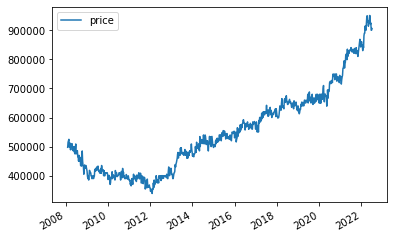

In [24]:
price_data.plot.line(y="price", use_index=True)
## price rise 400k from 2008 to 2022

In [25]:
price_data["adj_price"] = price_data["price"] / price_data["cpi"] * 100

<AxesSubplot:>

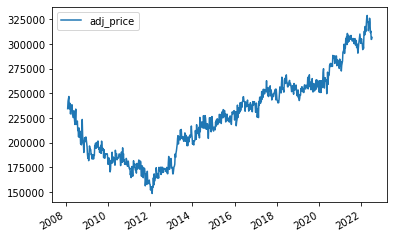

In [26]:
price_data.plot.line(y="adj_price", use_index=True)

In [27]:
price_data["adj_value"] = price_data["value"] / price_data["cpi"] * 100

<AxesSubplot:>

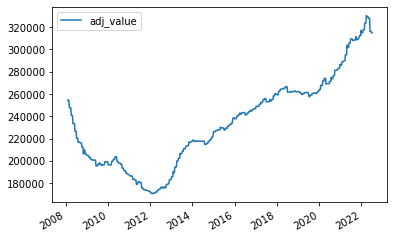

In [28]:
price_data.plot.line(y="adj_value", use_index=True)

In [29]:
price_data["next_quarter"] = price_data["adj_price"].shift(-13)

In [30]:
price_data

,cpi,interest,vacancy,price,value,adj_price,adj_value,next_quarter
2008-02-02,212.174,5.68,10.1,497500.0,540174.638831,234477.362919,254590.401666,231171.703654
2008-02-09,212.687,5.67,10.1,515000.0,540174.638831,242139.858101,253976.330867,225363.369391
2008-02-16,212.687,5.72,10.1,520000.0,540174.638831,244490.73051,253976.330867,232333.370507
2008-02-23,212.687,6.04,10.1,525000.0,540174.638831,246841.602919,253976.330867,232101.037136
2008-03-01,212.687,6.24,10.1,498250.0,528354.938674,234264.435532,248419.009471,222575.368945
...,...,...,...,...,...,...,...,...
2022-06-11,295.328,5.23,5.6,920500.0,933648.296046,311687.344241,316139.443617,NaN
2022-06-18,295.328,5.78,5.6,925000.0,933648.296046,313211.073789,316139.443617,NaN
2022-06-25,295.328,5.81,5.6,900000.0,933648.296046,304745.909633,316139.443617,NaN
2022-07-02,295.328,5.70,5.6,900500.0,929753.425908,304915.212916,314820.615014,NaN


In [31]:
price_data.dropna(inplace=True)

In [32]:
price_data

,cpi,interest,vacancy,price,value,adj_price,adj_value,next_quarter
2008-02-02,212.174,5.68,10.1,497500.0,540174.638831,234477.362919,254590.401666,231171.703654
2008-02-09,212.687,5.67,10.1,515000.0,540174.638831,242139.858101,253976.330867,225363.369391
2008-02-16,212.687,5.72,10.1,520000.0,540174.638831,244490.73051,253976.330867,232333.370507
2008-02-23,212.687,6.04,10.1,525000.0,540174.638831,246841.602919,253976.330867,232101.037136
2008-03-01,212.687,6.24,10.1,498250.0,528354.938674,234264.435532,248419.009471,222575.368945
...,...,...,...,...,...,...,...,...
2022-03-12,287.708,3.85,5.8,914750.0,931407.638755,317943.887553,323733.660084,311687.344241
2022-03-19,287.708,4.16,5.8,900000.0,931407.638755,312817.161845,323733.660084,313211.073789
2022-03-26,287.708,4.42,5.8,900000.0,931407.638755,312817.161845,323733.660084,304745.909633
2022-04-02,287.708,4.67,5.8,925000.0,950811.533011,321506.527451,330477.961339,304915.212916


In [33]:
price_data["change"] = (price_data["next_quarter"] > price_data["adj_price"]).astype(int)

In [34]:
price_data

,cpi,interest,vacancy,price,value,adj_price,adj_value,next_quarter,change
2008-02-02,212.174,5.68,10.1,497500.0,540174.638831,234477.362919,254590.401666,231171.703654,0
2008-02-09,212.687,5.67,10.1,515000.0,540174.638831,242139.858101,253976.330867,225363.369391,0
2008-02-16,212.687,5.72,10.1,520000.0,540174.638831,244490.73051,253976.330867,232333.370507,0
2008-02-23,212.687,6.04,10.1,525000.0,540174.638831,246841.602919,253976.330867,232101.037136,0
2008-03-01,212.687,6.24,10.1,498250.0,528354.938674,234264.435532,248419.009471,222575.368945,0
...,...,...,...,...,...,...,...,...,...
2022-03-12,287.708,3.85,5.8,914750.0,931407.638755,317943.887553,323733.660084,311687.344241,0
2022-03-19,287.708,4.16,5.8,900000.0,931407.638755,312817.161845,323733.660084,313211.073789,1
2022-03-26,287.708,4.42,5.8,900000.0,931407.638755,312817.161845,323733.660084,304745.909633,0
2022-04-02,287.708,4.67,5.8,925000.0,950811.533011,321506.527451,330477.961339,304915.212916,0


In [35]:
## before apply our machine learning model, lets take a quick look at our change
price_data["change"].value_counts()

1    384
0    338
Name: change, dtype: int64

In [36]:
predictors = ["interest", "vacancy", "adj_price", "adj_value"]
target = "change"

## Creating a Machine Learning Model

In [57]:
## RandomForest is a basic model that I can throw almost ml tasks and it'll work pretty well, 
## control overfitting and it can pick up non-linear tendencies data
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [58]:
## First thing, create predict function
def predict(train, test, predictors, target):
    rf = RandomForestClassifier(min_samples_split=10, random_state=1)
    rf.fit(train[predictors], train[target])
    preds = rf.predict(test[predictors])
    return preds

## Creating a Backtesting Engine

In [59]:
## backtest function lets us generate predictions for most of our dataset but do it in a 
## way that respects the order of the dataset avoid using future data to predict the past
## take data from 2008 to 2013 to make predictions for 2014, and 2008 to 2014 to predict 2015

START = 260
STEP = 52

def backtest(data, predictors, target):
    all_preds = []
    for i in range(START, data.shape[0], STEP):
        train = price_data.iloc[:i]
        test = price_data.iloc[i:(i+STEP)]
        all_preds.append(predict(train, test, predictors, target))
        
    preds = np.concatenate(all_preds)
    accuracy = accuracy_score(data.iloc[START:][target], preds)  # Calculate accuracy
    return preds, accuracy

## Measuring Error

In [60]:
preds, accuracy = backtest(price_data, predictors, target)

In [61]:
accuracy

0.5324675324675324

## Improving our Accuracy

In [62]:
yearly = price_data.rolling(52, min_periods=1).mean()

In [63]:
yearly

,cpi,interest,vacancy,price,value,adj_price,adj_value,next_quarter,change,interest_year,vacancy_year,adj_price_year,adj_value_year
2008-02-02,212.174000,5.680000,10.100000,497500.000000,540174.638831,234477.362919,254590.401666,231171.703654,0.000000,1.000000,1.000000,1.000000,1.000000
2008-02-09,212.430500,5.675000,10.100000,506250.000000,540174.638831,238308.610510,254283.366266,228267.536523,0.000000,0.999559,1.000000,1.008038,0.999396
2008-02-16,212.516000,5.690000,10.100000,510833.333333,540174.638831,240369.317177,254181.021133,229622.814517,0.000000,1.001464,1.000000,1.011074,0.999329
2008-02-23,212.558750,5.777500,10.100000,514375.000000,540174.638831,241987.388612,254129.848567,230242.370172,0.000000,1.012457,1.000000,1.013321,0.999346
2008-03-01,212.584400,5.870000,10.100000,511150.000000,537810.698799,240442.797996,252987.680747,228708.969927,0.000000,1.022572,1.000000,1.005517,0.995865
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-12,274.619904,3.115000,5.934615,832226.923077,845250.650985,303018.807451,307617.705773,307601.790305,0.557692,1.059264,0.945879,1.039636,1.053034
2022-03-19,275.056058,3.136923,5.915385,834534.615385,848395.343507,303374.742758,308271.491679,307801.660742,0.557692,1.065335,0.944091,1.038996,1.053146
2022-03-26,275.492212,3.163269,5.896154,836553.846154,851540.036029,303621.836154,308925.277586,307771.314228,0.538462,1.072552,0.942377,1.037997,1.053241
2022-04-02,275.928365,3.193654,5.876923,839534.615385,855057.880364,304217.435919,309708.761594,307726.480039,0.519231,1.080725,0.940737,1.038191,1.053729


In [64]:
yearly_ratios = [p + "_year" for p in predictors]
price_data[yearly_ratios] = price_data[predictors] / yearly[predictors]

In [65]:
price_data

,cpi,interest,vacancy,price,value,adj_price,adj_value,next_quarter,change,interest_year,vacancy_year,adj_price_year,adj_value_year
2008-02-02,212.174,5.68,10.1,497500.0,540174.638831,234477.362919,254590.401666,231171.703654,0,1.000000,1.000000,1.0,1.0
2008-02-09,212.687,5.67,10.1,515000.0,540174.638831,242139.858101,253976.330867,225363.369391,0,0.999119,1.000000,1.016077,0.998793
2008-02-16,212.687,5.72,10.1,520000.0,540174.638831,244490.73051,253976.330867,232333.370507,0,1.005272,1.000000,1.017146,0.999195
2008-02-23,212.687,6.04,10.1,525000.0,540174.638831,246841.602919,253976.330867,232101.037136,0,1.045435,1.000000,1.02006,0.999396
2008-03-01,212.687,6.24,10.1,498250.0,528354.938674,234264.435532,248419.009471,222575.368945,0,1.063032,1.000000,0.974304,0.981941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-12,287.708,3.85,5.8,914750.0,931407.638755,317943.887553,323733.660084,311687.344241,0,1.235955,0.977317,1.049255,1.05239
2022-03-19,287.708,4.16,5.8,900000.0,931407.638755,312817.161845,323733.660084,313211.073789,1,1.326140,0.980494,1.031125,1.050158
2022-03-26,287.708,4.42,5.8,900000.0,931407.638755,312817.161845,323733.660084,304745.909633,0,1.397289,0.983692,1.030285,1.047935
2022-04-02,287.708,4.67,5.8,925000.0,950811.533011,321506.527451,330477.961339,304915.212916,0,1.462275,0.986911,1.056831,1.06706


In [66]:
preds, accuracy = backtest(price_data, predictors + yearly_ratios, target)

In [67]:
accuracy

0.564935064935065

In [68]:
pred_match = (preds == price_data[target].iloc[START:])

In [69]:
pred_match[pred_match == True] = "green"
pred_match[pred_match == False] = "red"

<AxesSubplot:xlabel='index', ylabel='adj_price'>

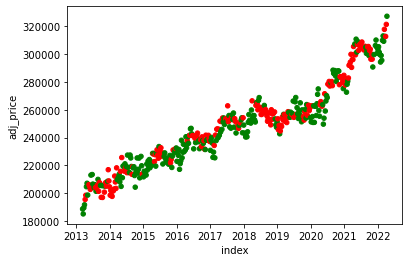

In [71]:
import matplotlib.pyplot as plt

plot_data = price_data.iloc[START:].copy()

plot_data.reset_index().plot.scatter(x="index", y="adj_price", color=pred_match)

In [72]:
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(min_samples_split=10, random_state=1)
rf.fit(price_data[predictors], price_data[target])

result = permutation_importance(rf, price_data[predictors], price_data[target], n_repeats=10, random_state=1)

In [73]:
result["importances_mean"]

array([0.19833795, 0.20775623, 0.30512465, 0.20706371])

In [74]:
predictors

['interest', 'vacancy', 'adj_price', 'adj_value']